C:\Users\IronCore-2024\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


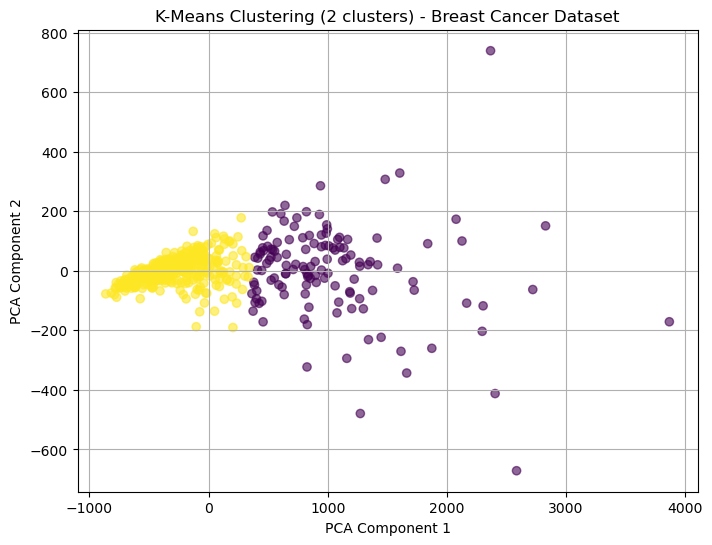

Best Clustering Accuracy: 0.8541300527240774


In [8]:
# Import required Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# PCA: used to reduce dimensions for easy 2D plotting.
import matplotlib.pyplot as plt

# Compare predicted Labels with actual (this may not align exactly)
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Not used for training, only to compare with clustering
# X: features (shape: 569 × 30)
# y: actual Labels (0 = malignant, 1 = benign), used only for evaluation

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_  # Corrected: Use labels_ to get cluster labels
# n_clusters=2: since there are 2 classes (malignant/benign)
# Labels: predicted cluster Labels (0 or 1)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# PCA compresses 30 features into 2D for plotting
# X_reduced: 2D representation of the data

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering (2 clusters) - Breast Cancer Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
# Points are colored by cluster (c=labels)
# This shows how K-Means grouped the samples visually.

# Convert all predicted 0s to 1s and vice versa to match actual labels better
adjusted_labels = 1 - labels  # Try both labels and adjusted_labels
acc1 = accuracy_score(y, labels)
acc2 = accuracy_score(y, adjusted_labels)
print("Best Clustering Accuracy:", max(acc1, acc2))